# Importuri necesare

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Descarcare / citire date

In [4]:
! rm -rf data*
! wget https://github.com/artificial-intelligence-ml-cti/ml_cti/raw/main/laborator3/data.zip
! unzip "data.zip"

! echo "***\n Fisierele sunt: "
! ls data/
! echo "****\n Calea catre directorul cu date este: "
! readlink -f data/


--2021-11-02 09:15:15--  https://github.com/artificial-intelligence-ml-cti/ml_cti/raw/main/laborator3/data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/artificial-intelligence-ml-cti/ml_cti/main/laborator3/data.zip [following]
--2021-11-02 09:15:15--  https://raw.githubusercontent.com/artificial-intelligence-ml-cti/ml_cti/main/laborator3/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 614.89K  --.-KB/s    in 0.007s  

2021-11-02 09:15:16 (82.2 MB/s) - ‘data.zip’ saved [629644/629

Director date

In [5]:
data_path = "/content/data"

Citire date si etichete train

In [8]:
# variabile pentru calea catre fisier
train_path = os.path.join(data_path, "train_images.txt")
tr_labels_path = os.path.join(data_path, "train_labels.txt")
test_path = os.path.join(data_path, "test_images.txt")
ts_labels_path = os.path.join(data_path, "test_labels.txt")

# variabile cu fisierele incarcate
train_images = np.loadtxt(train_path, 'uint8')
train_labels = np.loadtxt(tr_labels_path, 'int8')
test_images = np.loadtxt(test_path, 'uint8')
test_labels = np.loadtxt(ts_labels_path, 'int8')

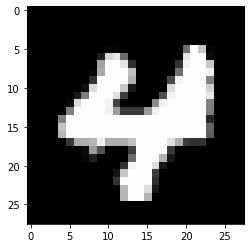

In [33]:
image = train_images[0,:]
image = np.reshape(image,(28,28))
plt.imshow(image,cmap = "gray")
plt.show()

# Probabilitatile apriori
Calculul probabilitatilor apriori $P(c=i)$, `i = 0,...,9` din datele de antrenare. Pentru fiecare clasă probabilitatea este dată de o distribuție discretă - numărul de apariții ale acelei clase din numărul total de clase.

In [11]:
p_C = np.zeros(10, 'uint8')
for eticheta in train_labels:
  p_C[eticheta] += 1
# numaratori:
print(p_C)
print(np.bincount(train_labels))

# probabilitati:
p_C = p_C / np.sum(p_C)

[ 91 120  96  99 105  83  98 104 101 103]
[ 91 120  96  99 105  83  98 104 101 103]


array([0.091, 0.12 , 0.096, 0.099, 0.105, 0.083, 0.098, 0.104, 0.101,
       0.103])

# Histograma
Cum sa facem o histograma (adica o numarare) in functie de niste intervale date.
1. Facem intervalele `[0, 64, 128]`, in cazul asta sunt 2 `[0-64)` si `[64 - 128)`
2. Apelam `np.histogram(numere, intervale)` care va numara cate numere sunt in fiecare interval

In [15]:
date_exemplu = np.array([0, 63, 63, 64, 65, 128, 255, 15, 254, 89, 192])
numar_intervale = 4
# linspace e o functie din numpy, in cazul in care ne e lene sa le facem de mana
limite_interval = np.linspace(0, 256, numar_intervale + 1)
print(limite_interval)

# de mana:
limite_interval = [0, 64, 128, 192, 256]
print(limite_interval)

histograma, _ = np.histogram(date_exemplu, limite_interval)
print(histograma)

[  0.  64. 128. 192. 256.]
[4 3 1 3]


In [16]:
histograma, _ = np.histogram(train_images[0, :], limite_interval)
print(histograma)

[589  12  24 159]


# Exemplu de calcul pentru probabilitatea valorii unui pixel constrans de o clasa data
Calculul $P(X_j = x_j | c=i)$ pentru clasa `i = 4`, pixelul `j = 370`

In [31]:
clasa = 4
pozitie_pixel = 370

indecsii_coresp_clasei = np.where( train_labels == clasa )[0]
print(indecsii_coresp_clasei)

imaginile_coresp_clasei = train_images[indecsii_coresp_clasei, :]

[  0   5   8  20  21  27  31  89  96 103 109 111 127 144 153 155 160 172
 177 181 184 193 202 211 214 240 245 267 308 312 339 348 352 356 359 391
 393 423 430 436 455 457 480 484 496 504 505 512 516 521 525 526 527 538
 540 546 561 562 572 583 586 606 617 628 630 635 642 650 669 676 678 682
 687 705 707 740 744 745 758 767 785 791 792 823 841 849 865 870 873 876
 884 886 888 894 896 911 913 928 940 962 965 966 978 989 991]


In [29]:
# la o prima vedere, valorile astea nu spun nimic
print(imaginile_coresp_clasei[:, pozitie_pixel])
# dar incercati sa schimbati clasa sa vedeti ce valori au 
# piexlii de aceeasi pozitie in functie de clasa
# ochiometric observati cam in ce intervale se gasesc

[  0   0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0
 157   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 107   0   0   0   0   0   0   0]


In [30]:
limite_interval = [0, 64, 128, 192, 256]
print(limite_interval)
histograma, _ = np.histogram(imaginile_coresp_clasei[:, pozitie_pixel], limite_interval)
print(histograma)

probabilitati_pe_interval = histograma / np.sum(histograma)

print(probabilitati_pe_interval)



[0, 64, 128, 192, 256]
[96  1  1  1]
[0.96969697 0.01010101 0.01010101 0.01010101]


In [32]:
# probabilitatea ca pixelul de pe pozitia 370 sa aiba valoarea 15, constrans de clasa 4 
# este valoarea din probabilitati_pe_interval coresp intervalului unde se gaseste 15 (adica 0-64)


In [ ]:
def probab_pixel(o_valoare_pixel, pozitie_pixel, clasa, train_images, train_labels):
  indecsii_coresp_clasei = np.where( train_labels == clasa )[0]
  imaginile_coresp_clasei = train_images[indecsii_coresp_clasei, :]
  pixelii_corespunzatori_pozitiei_si_clasei = imaginile_coresp_clasei[:, pozitie_pixel]
  
  limite_interval = [0, 64, 128, 192, 256]
  histograma, _ = np.histogram(pixelii_corespunzatori_pozitiei_si_clasei, limite_interval)
  probabilitati_pe_interval = histograma / np.sum(histograma)

  # o_valoare_pixel in ce interval pica?
  # vezi https://numpy.org/doc/stable/reference/generated/numpy.digitize.html
  # data viitoare continuam de aici...
  # cum se poate optimiza aceasta functie?



